# Semantic Segmentation vs Instance Segmentation

시맨틱 세그멘테이션
- 이미지의 각 픽셀을 해당하는 클래스 또는 카테고리로 레이블링
- 픽셀 수준에서 이미지를 서로 다른 영역으로 분할함

인스턴스 세그멘테이션
- 동일한 클래스 내의 개별 인스턴스 또는 객체를 구분함
- 각 객체 인스턴스가 개별적으로 식별되고 레이블이 지정됨

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Mask_RCNN 설치
%cd /content/drive/MyDrive/CV_modules
!git clone https://github.com/alsombra/Mask_RCNN-TF2

%cd Mask_RCNN-TF2

!ls

/content/drive/MyDrive/CV_modules
fatal: destination path 'Mask_RCNN-TF2' already exists and is not an empty directory.
/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2
assets	dist	LICENSE      mask_rcnn_coco.h5	 mrcnn	    requirements.txt  setup.cfg
build	images	MANIFEST.in  mask_rcnn.egg-info  README.md  samples	      setup.py


In [ ]:
!pip install -r requirements.txt
!python setup.py install

In [ ]:
%cd ..

/content/drive/MyDrive/CV_modules


In [ ]:
!ls

Mask_RCNN-TF2


In [ ]:
import os

root_dir = os.path.abspath ('./Mask_RCNN-TF2')
root_dir

'/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2'

In [ ]:
import sys

sys.path.append(root_dir)
sys.path

In [ ]:
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

In [ ]:
sys.path.append(os.path.join(root_dir, 'samples/coco/'))
sys.path

import coco

In [ ]:
MODEL_DIR = os.path.join(root_dir, 'logs')
IMAGE_DIR = os.path.join(root_dir, 'images')

In [ ]:
MODEL_DIR, IMAGE_DIR

('/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/logs',
 '/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/images')

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
COCO_MODEL_PATH = os.path.join(root_dir, 'mask_rcnn_coco.h5')
COCO_MODEL_PATH

'/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/mask_rcnn_coco.h5'

In [ ]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [ ]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [ ]:
config = InferenceConfig()

In [ ]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
# numpy bool 오류 발생으로 downgrade 해줌
pip install numpy==1.23.5

In [ ]:
network = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

In [ ]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

In [ ]:
# 카테고리 생성
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
# 클래스 갯수
len(class_names)

81

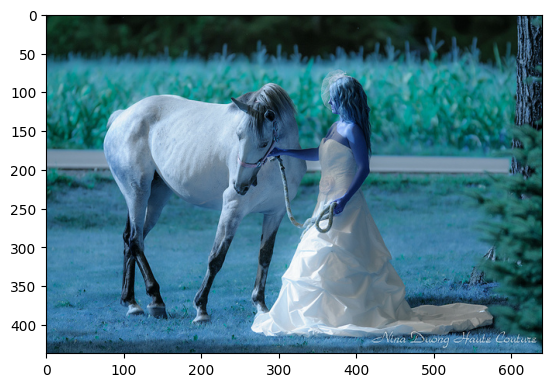

In [ ]:
img_path = '/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/images/8433365521_9252889f9a_z.jpg'
image2 = cv2.imread(img_path)
plt.imshow(image2)

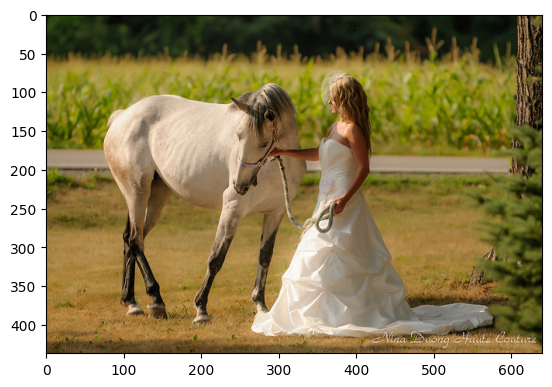

In [ ]:
img_path = '/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/images/8433365521_9252889f9a_z.jpg'
image = skimage.io.imread(img_path)
plt.imshow(image)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


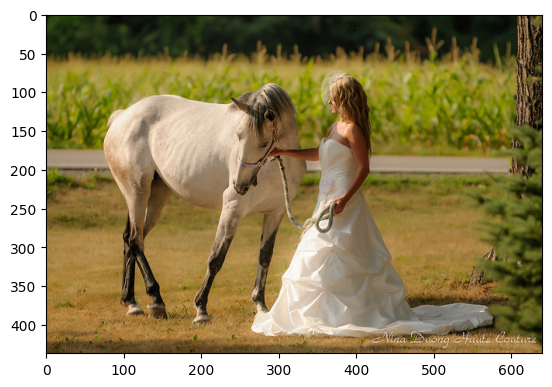

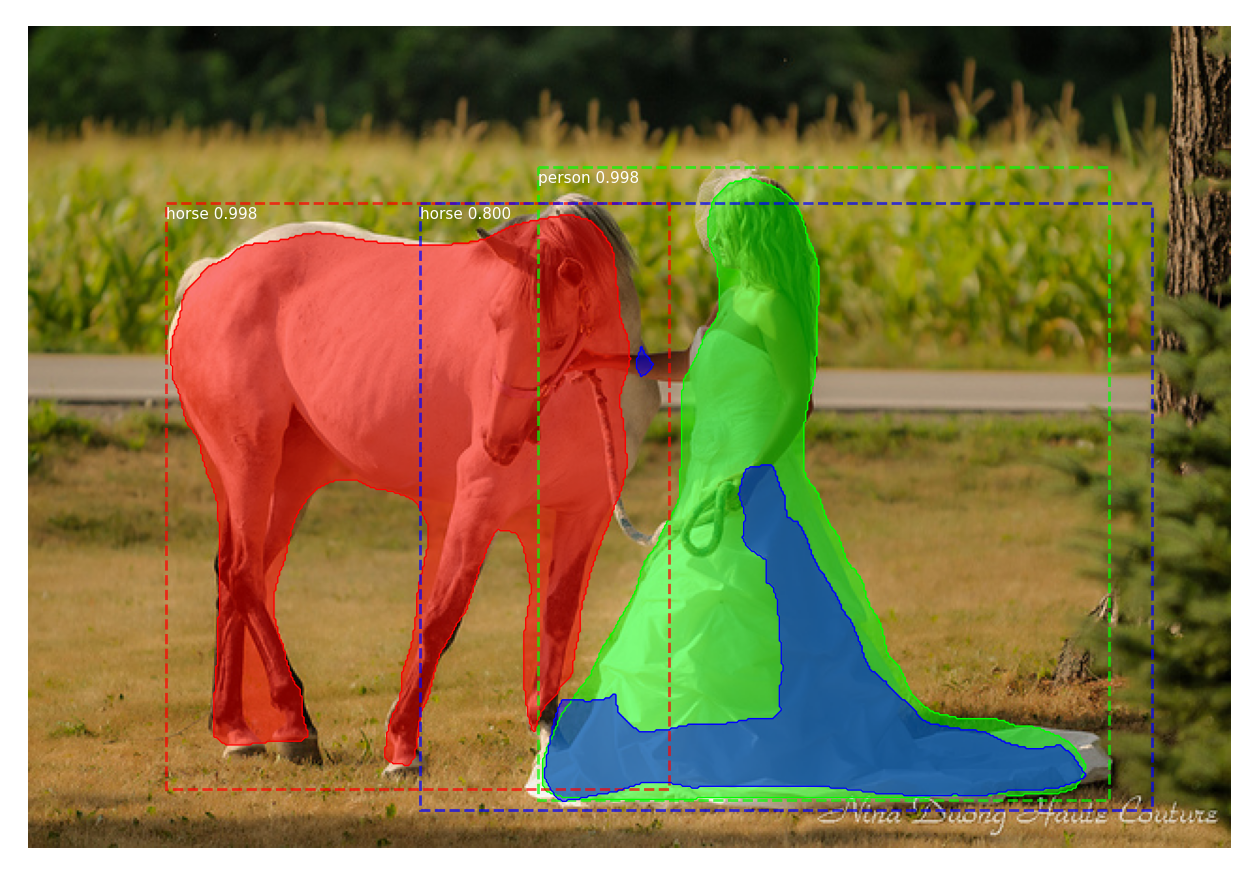

In [ ]:
img_path = '/content/drive/MyDrive/CV_modules/Mask_RCNN-TF2/images/8433365521_9252889f9a_z.jpg'
image_BGR = image2
image_RGB = image
plt.imshow(image_RGB)

result = network.detect([image_BGR], verbose = 0)
r = result[0]
visualize.display_instances(image_RGB,
                            r['rois'],
                            r['masks'],
                            r['class_ids'],
                            class_names,
                            r['scores']
                            )

#Image Masking

In [ ]:
# 중복 값 제거 (해당 객체 외 모든 픽셀 = 0)
np.unique(r['masks'], return_counts=True)

(array([False,  True]), array([743302,  95738]))

In [ ]:
r['masks']

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

In [ ]:
def segment(image, r, index):
  # 해당 index의 mask 선택
  mask = r['masks'][:,:,index]

  # mask를 3차원으로 저장

  mask = np.stack((mask,) * 3, axis = -1)

  # 이미지 처리를 위해 uint8로 변환
  mask = mask.astype('uint8')

  # 배경 = 255 - mask 값
  bg = 255 - mask * 255

  # 배경 = 0
  mask_show = np.invert(bg)

  # 원래 이미지에 mask 적용
  mask_img = image * mask

  result = mask_img + bg
  return result, mask_show

In [ ]:
image.shape, 425 * 640

((437, 640, 3), 272000)

In [ ]:
segmentation, mask_obj = segment(image, r, 0)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
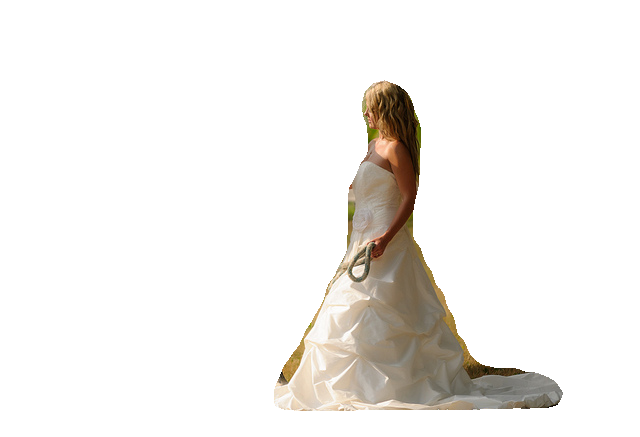

In [ ]:
# mask_img + bg
segmentation

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
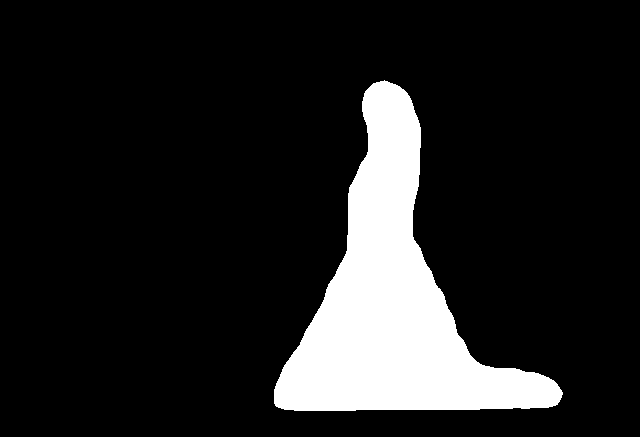

In [ ]:
# np.invert(bg)
mask_obj

In [ ]:
def show_segment(image, r, index, show_mask = False):
  segmentation, mask_obj = segment(image, r, index)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')
  if show_mask == True:
    plt.imshow(np.concatenate([mask_obj, segmentation], axis = 1))
  else:
    plt.imshow(np.concatenate([image, segmentation], axis = 1))

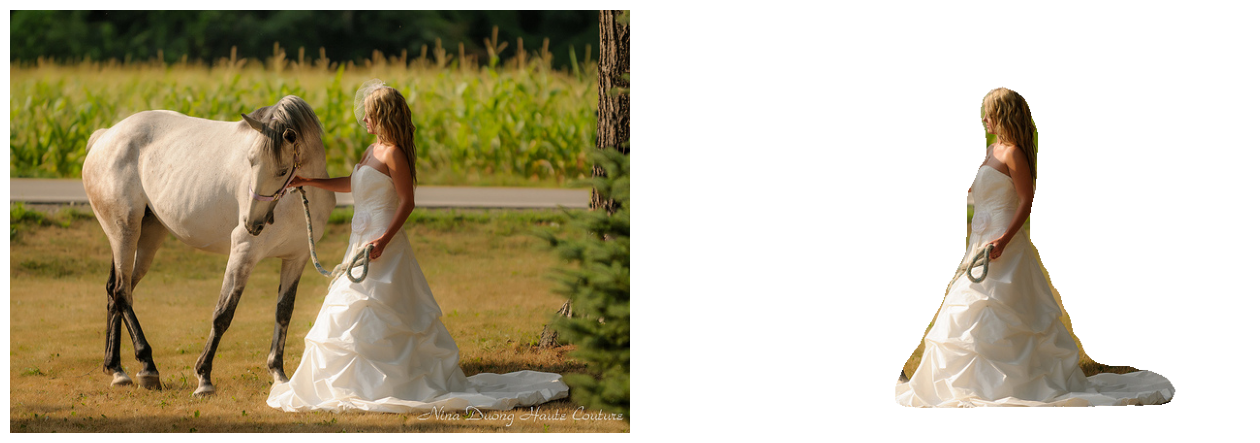

In [ ]:
show_segment(image, r, 0, False)

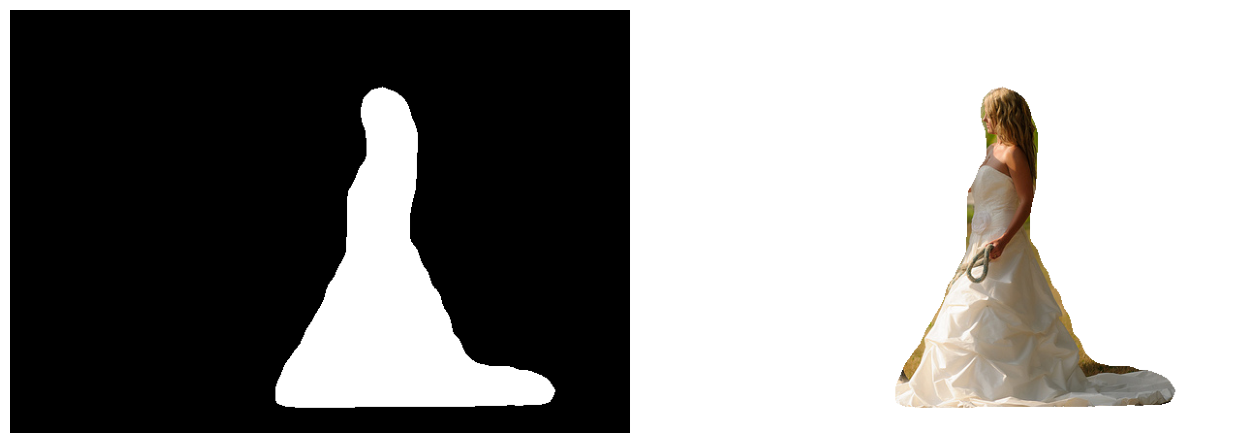

In [ ]:
show_segment(image, r, 0, True)

In [ ]:
r['rois'], len(r['rois'])

(array([[ 74, 271, 411, 575],
        [ 93,  73, 405, 341],
        [ 93, 208, 416, 598]], dtype=int32),
 3)

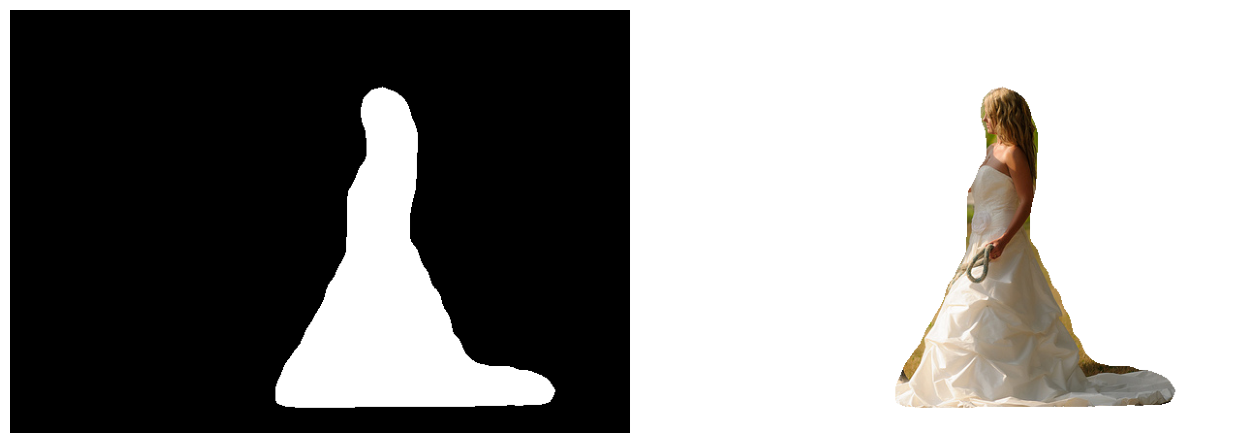

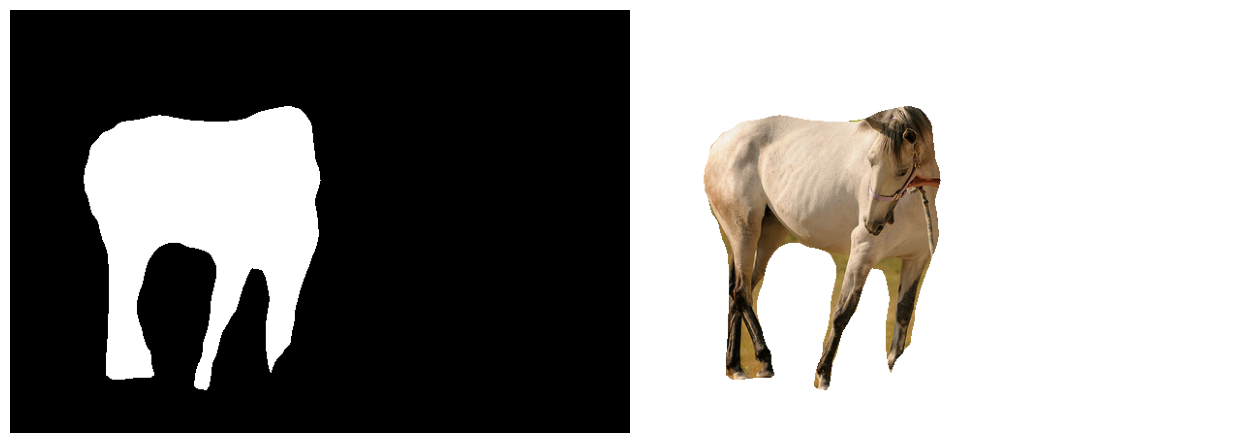

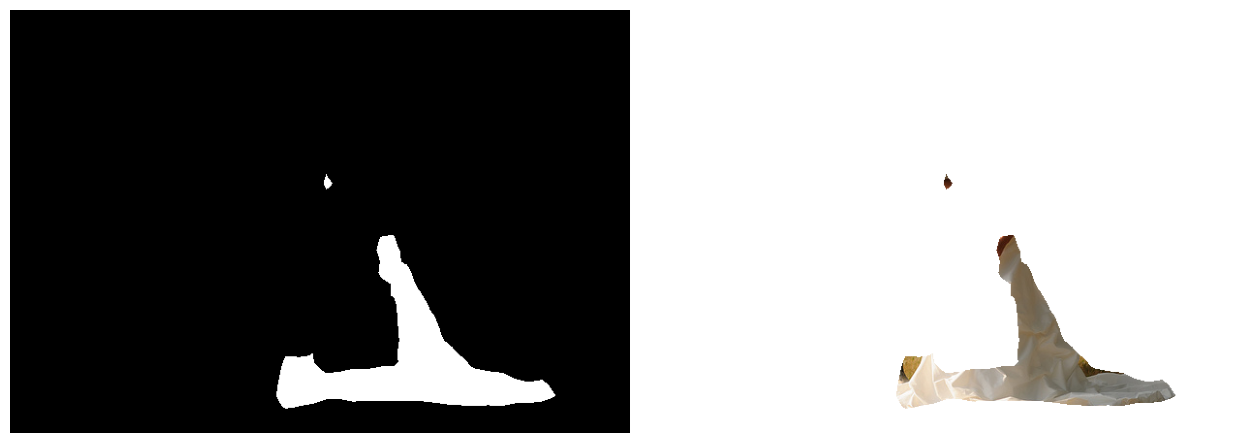

In [ ]:
# 객체 갯수에 따라 이미지 마스킹 → 구분이 확실한 이미지 사용해볼 것
for index in range(len(r['rois'])):
  show_segment(image, r, index, True)